<a href="https://colab.research.google.com/github/HChandeepa/Lung_Sound_Classification_System/blob/Master/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiolitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Lung Fibrosis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI Normalized'
]

In [ ]:
# Feature extraction parameters
n_fft = 2048  # FFT window size
hop_length = 512  # Number of samples between successive frames
n_mels = 128  # Number of Mel bands
n_mfcc = 13  # Number of MFCCs to extract
n_chroma = 12  # Chromagram bins

# Loop through each folder path and extract features from each .wav file
for folder_path in folder_paths:
    # List all .wav files in the folder
    wav_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

    print(f'Processing files in {os.path.basename(folder_path)}:')

    for wav_file in wav_files:
        file_path = os.path.join(folder_path, wav_file)

        # Load the audio file
        audio_data, sr = librosa.load(file_path, sr=22050)

        # Extract Mel Spectrogram (128 bands by default)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Extract MFCC (13 coefficients)
        mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

        # Extract Chromagram
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr, n_fft=n_fft, hop_length=hop_length)

        # Ensure all features have the same time frames (e.g., 264)
        max_time_frames = mel_spectrogram_db.shape[1]  # Use the time frames from Mel Spectrogram

        # Resize features to have the same time frames
        mel_spectrogram_db_resized = librosa.util.fix_length(mel_spectrogram_db, size=max_time_frames, axis=1)
        mfcc_resized = librosa.util.fix_length(mfcc, size=max_time_frames, axis=1)
        chroma_resized = librosa.util.fix_length(chroma, size=max_time_frames, axis=1)

        # Resize MFCC and Chromagram frequency dimensions to match the Mel Spectrogram (128 frequency bins)
        mfcc_resized = np.resize(mfcc_resized, (n_mels, max_time_frames))  # Resize MFCC to 128xTime
        chroma_resized = np.resize(chroma_resized, (n_mels, max_time_frames))  # Resize Chromagram to 128xTime

        # Stack features along the 3rd dimension to form a 3D feature representation
        stacked_features = np.stack([mel_spectrogram_db_resized, mfcc_resized, chroma_resized], axis=-1)

        # print(f'{wav_file}: Extracted and stacked features with shape {stacked_features.shape}')

        # Optional: Save or return the stacked features for further use
        # You could save each stacked feature set as a .npy file
        # np.save(f'stacked_features_{os.path.basename(wav_file)}.npy', stacked_features)

        # # Visualize the stacked features (Optional)
        # plt.figure(figsize=(10, 4))
        # plt.imshow(np.mean(stacked_features, axis=-1), aspect='auto', origin='lower')
        # plt.title(f'Stacked Features - {wav_file}')
        # plt.colorbar()
        # plt.tight_layout()
        # plt.show()

Processing files in Asthma Normalized:
Processing files in Bronchiectasis Normalized:
Processing files in Bronchiolitis Normalized:
Processing files in Bronchitis Normalized:
Processing files in COPD Normalized:
Processing files in Healthy Normalized:
Processing files in Lung Fibrosis Normalized:
Processing files in Plueral Effusion Normalized:
Processing files in Pneumonia Normalized:
Processing files in URTI Normalized:


Processing file: normalized_201_1b3_Al_sc_Meditron_segment_0.wav from folder: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis Normalized


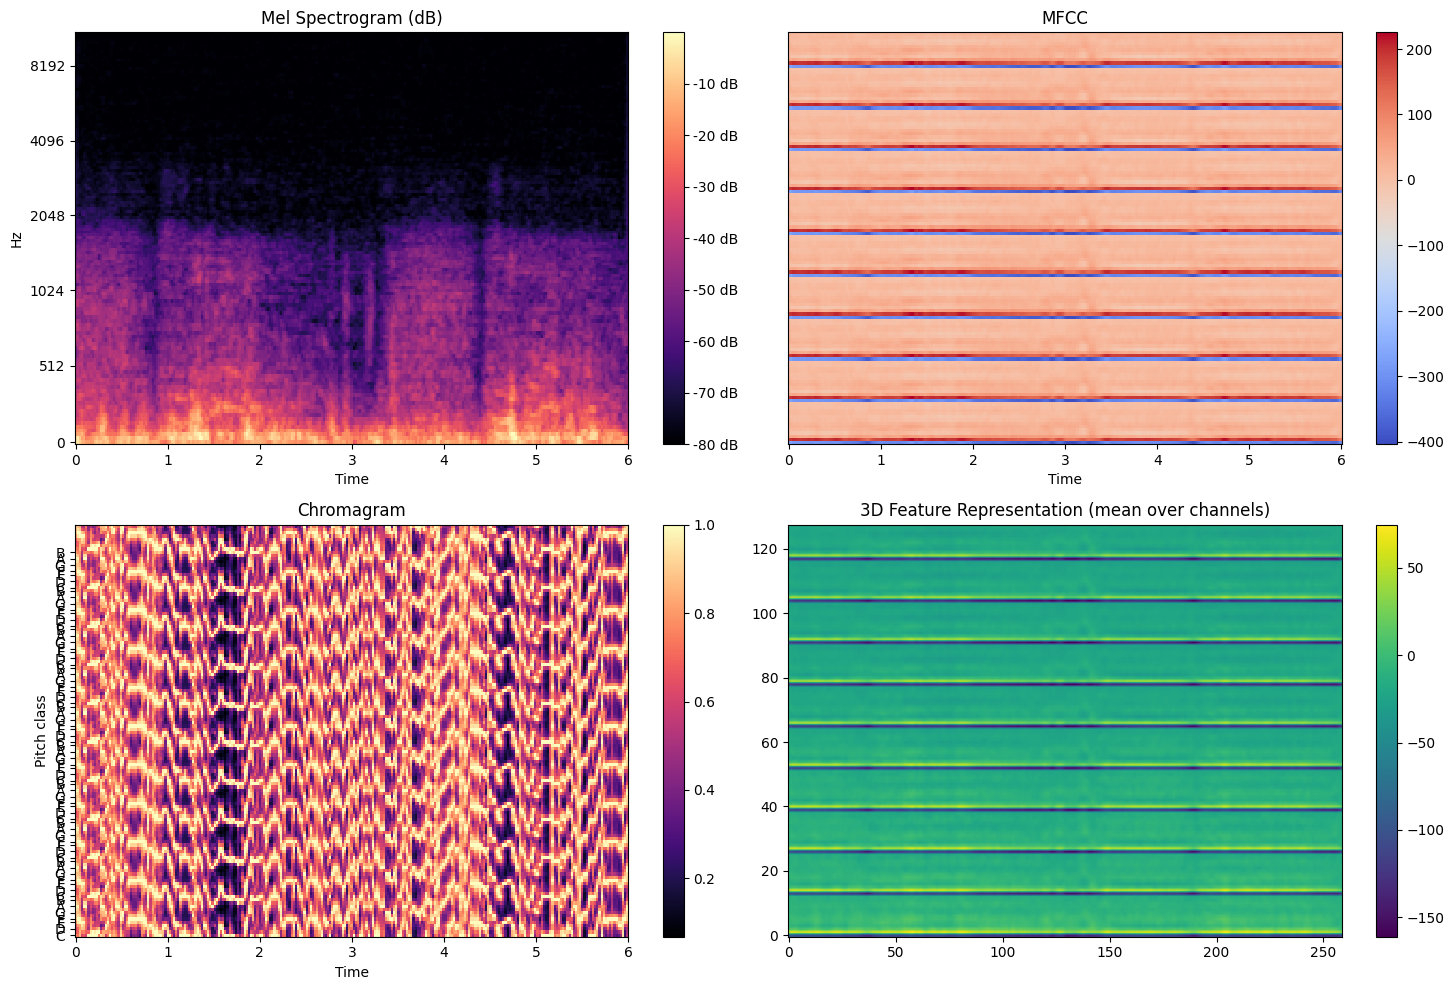

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import random
import librosa.display

# Select a random folder and a random .wav file for testing the features
random_folder = random.choice(folder_paths)
wav_files = [file for file in os.listdir(random_folder) if file.endswith('.wav')]

if not wav_files:
    print(f"No .wav files found in folder: {random_folder}")
else:
    random_wav_file = random.choice(wav_files)
    file_path = os.path.join(random_folder, random_wav_file)

    print(f"Processing file: {random_wav_file} from folder: {random_folder}")

    # Load the audio file
    audio_data, sr = librosa.load(file_path, sr=22050)

    # Extract Mel Spectrogram (128 bands by default)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Extract MFCC (13 coefficients)
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

    # Extract Chromagram
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Ensure all features have the same time frames (e.g., 264)
    max_time_frames = mel_spectrogram_db.shape[1]  # Use the time frames from Mel Spectrogram

    # Resize features to have the same time frames
    mel_spectrogram_db_resized = librosa.util.fix_length(mel_spectrogram_db, size=max_time_frames, axis=1)
    mfcc_resized = librosa.util.fix_length(mfcc, size=max_time_frames, axis=1)
    chroma_resized = librosa.util.fix_length(chroma, size=max_time_frames, axis=1)

    # Resize MFCC and Chromagram frequency dimensions to match the Mel Spectrogram (128 frequency bins)
    mfcc_resized = np.resize(mfcc_resized, (n_mels, max_time_frames))  # Resize MFCC to 128xTime
    chroma_resized = np.resize(chroma_resized, (n_mels, max_time_frames))  # Resize Chromagram to 128xTime

    # Stack features along the 3rd dimension to form a 3D feature representation
    stacked_features = np.stack([mel_spectrogram_db_resized, mfcc_resized, chroma_resized], axis=-1)

    # Plot the results
    plt.figure(figsize=(15, 10))

    # Plot Mel Spectrogram
    plt.subplot(2, 2, 1)
    librosa.display.specshow(mel_spectrogram_db_resized, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.title('Mel Spectrogram (dB)')
    plt.colorbar(format='%+2.0f dB')

    # Plot MFCC
    plt.subplot(2, 2, 2)
    librosa.display.specshow(mfcc_resized, sr=sr, hop_length=hop_length, x_axis='time')
    plt.title('MFCC')
    plt.colorbar()

    # Plot Chromagram
    plt.subplot(2, 2, 3)
    librosa.display.specshow(chroma_resized, sr=sr, hop_length=hop_length, x_axis='time', y_axis='chroma')
    plt.title('Chromagram')
    plt.colorbar()

    # Plot 3D feature representation by averaging across the third dimension
    plt.subplot(2, 2, 4)
    plt.imshow(np.mean(stacked_features, axis=2), aspect='auto', origin='lower')
    plt.title('3D Feature Representation (mean over channels)')
    plt.colorbar()

    plt.tight_layout()
    plt.show()